<a href="https://colab.research.google.com/github/camayli/Trabajo-Final-Aprendiza-Autom-tico-II-/blob/main/Modelo_N%C2%B02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Patricia

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

import kagglehub
from kagglehub import KaggleDatasetAdapter
from sklearn.model_selection import train_test_split

##**1. Carga de datos**

In [6]:
!pip install -q kagglehub[pandas-datasets]

warnings.filterwarnings("ignore", category=FutureWarning)

file_path = "water_potability.csv"

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "adityakadiwal/water-potability",
    file_path,
)

/tmp/ipython-input-3234254166.py:7: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'water-potability' dataset.


In [7]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


##**2. Análisis Exploratorio de Datos**

In [8]:
print(df.shape)

(3276, 10)


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None


In [10]:
print(df['Potability'].value_counts())

Potability
0    1998
1    1278
Name: count, dtype: int64


In [11]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


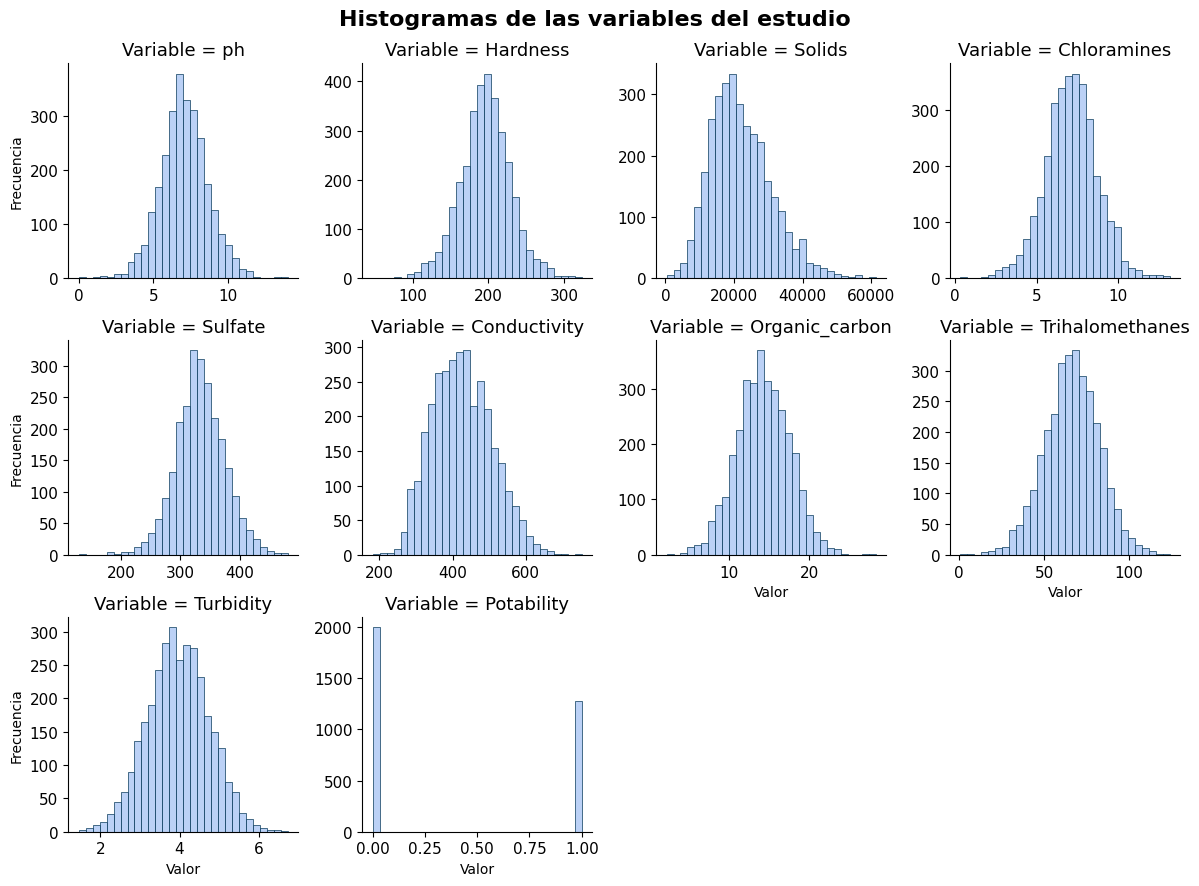

In [12]:
df_num = df.select_dtypes(include="number")
df_long = df_num.melt(var_name="Variable",value_name="Valor")

g = sns.FacetGrid(
    df_long,
    col="Variable",
    col_wrap=4,
    sharex=False,
    sharey=False
)

g.map_dataframe(
    sns.histplot,
    x="Valor",
    bins=30,color="#A4C2F4", edgecolor="#0B3C5D")

g.set_axis_labels("Valor", "Frecuencia")

g.fig.suptitle(
    "Histogramas de las variables del estudio",
    fontsize=16,
    fontweight="bold"
)

for ax in g.axes.flatten():
    ax.tick_params(labelsize=11)
    ax.set_title(ax.get_title(), fontsize=13)

plt.tight_layout()
plt.show()

##**3. Preprocesamiento de datos**

### **3.1. Separación train/test**

In [13]:
print(df['Potability'].value_counts())

Potability
0    1998
1    1278
Name: count, dtype: int64


> **Separar variables**

In [14]:
X = df.drop(columns='Potability')
y = df['Potability']

####### División Train /Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

### **3.2. Valores nulos y Escalado**

> **Imputamos valores nulos mediante KNN Imputation (k=7)**

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

imputer = KNNImputer(
    n_neighbors=7,        # puedes probar 3, 5, 7
    weights="distance"    # recomendado
)

X_train = imputer.fit_transform(X_train)
X_test  = imputer.transform(X_test)

### **3.3. Balanceo: SMOTE, ADASYN, OVERSAMPLING**

In [16]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler

# MODELOS
models = {
    "LogisticR": LogisticRegression(max_iter=1000),
    "RF": RandomForestClassifier(random_state=42),
    "SVM": SVC()
}

def evaluate_models_full(X_train_bal, y_train_bal, X_test, y_test):
    metrics = {}

    for name, model in models.items():
        model.fit(X_train_bal, y_train_bal)
        y_pred = model.predict(X_test)

        metrics[f"Accuracy_{name}"] = accuracy_score(y_test, y_pred)
        metrics[f"Recall_{name}"]   = recall_score(y_test, y_pred)
        metrics[f"F1_{name}"]       = f1_score(y_test, y_pred)

    return metrics

results = []

# SMOTE k=3
smote_3 = SMOTE(k_neighbors=3, random_state=42)
X_s3, y_s3 = smote_3.fit_resample(X_train, y_train)

row = evaluate_models_full(X_s3, y_s3, X_test, y_test)
row["Balanceo"] = "SMOTE_k3"
results.append(row)

# SMOTE k=7
smote_7 = SMOTE(k_neighbors=7, random_state=42)
X_s7, y_s7 = smote_7.fit_resample(X_train, y_train)

row = evaluate_models_full(X_s7, y_s7, X_test, y_test)
row["Balanceo"] = "SMOTE_k7"
results.append(row)

# ADASYN k=5
adasyn_5 = ADASYN(n_neighbors=5, random_state=42)
X_a5, y_a5 = adasyn_5.fit_resample(X_train, y_train)

row = evaluate_models_full(X_a5, y_a5, X_test, y_test)
row["Balanceo"] = "ADASYN_k5"
results.append(row)

# ADASYN k=9
adasyn_9 = ADASYN(n_neighbors=9, random_state=42)
X_a9, y_a9 = adasyn_9.fit_resample(X_train, y_train)

row = evaluate_models_full(X_a9, y_a9, X_test, y_test)
row["Balanceo"] = "ADASYN_k9"
results.append(row)

# RANDOM OVERSAMPLING
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

row = evaluate_models_full(X_ros, y_ros, X_test, y_test)
row["Balanceo"] = "RandomOver"
results.append(row)

results_df = pd.DataFrame(results)
results_df = results_df.set_index("Balanceo")

print("TABLA FINAL DE RESULTADOS:")
results_df

TABLA FINAL DE RESULTADOS:


,Accuracy_LogisticR,Recall_LogisticR,F1_LogisticR,Accuracy_RF,Recall_RF,F1_RF,Accuracy_SVM,Recall_SVM,F1_SVM
Balanceo,,,,,,,,,
SMOTE_k3,0.536585,0.578125,0.493333,0.637195,0.441406,0.487069,0.617378,0.519531,0.514507
SMOTE_k7,0.530488,0.585938,0.493421,0.646341,0.484375,0.516667,0.625000,0.523438,0.521401
ADASYN_k5,0.481707,0.671875,0.502924,0.617378,0.464844,0.486708,0.600610,0.617188,0.546713
ADASYN_k9,0.420732,0.820312,0.525000,0.638720,0.535156,0.536204,0.574695,0.640625,0.540362
RandomOver,0.528963,0.527344,0.466321,0.661585,0.382812,0.468900,0.618902,0.472656,0.491870


* 📌 Regresión Logística: Mejor balanceo: **ADASYN_k9** --> F1 = 0.5303 (el más alto entre las opciones)

* 📌 Random Forest: Mejor balanceo: **ADASYN_k9** --> F1 = 0.5295

* 📌 SVM: Mejor balanceo: **ADASYN_k9** --> F1 = 0.5478

## **4. Validación**

| Nº  | Método                                         | ¿Usar?                     | Evaluación       | Motivo principal                                                                                                                               |
| --- | ---------------------------------------------- | -------------------------- | ---------------- | ---------------------------------------------------------------------------------------------------------------------------------------------- |
| 1️⃣ | **Stratified k-fold Cross Validation**         | ✅ **SÍ (RECOMENDADO)** ⭐⭐⭐ | ✔️ Óptimo        | Mantiene la proporción de clases en cada fold. Es el método más correcto para datos desbalanceados. **Es el que deberías usar en el trabajo.** |
| 2️⃣ | **Repeticiones de Stratified k-fold**          | ✅ SÍ                       | ✔️ Muy bueno     | Aumenta la estabilidad de los resultados repitiendo el proceso estratificado varias veces.                                                     |
| 3️⃣ | **Shuffle Split (estratificado)**              | ⚠️ Aceptable               | ⚠️ Regular       | Genera splits aleatorios. Si es estratificado es válido, pero ofrece menos control que k-fold. Aceptable solo si se justifica bien.            |
| 4️⃣ | **k-fold Cross Validation (no estratificado)** | ❌ NO                       | ❌ Incorrecto     | Puede crear folds sin la clase minoritaria, lo que invalida métricas como Recall y F1. Además, **ADASYN puede fallar**.                        |
| 5️⃣ | **Leave-One-Out Cross Validation (LOOCV)**     | ❌❌ NO                      | ❌ Muy incorrecto | No es adecuado para este problema; genera evaluaciones inestables y poco representativas.                                                      |


### **4.1. Repeticiones de k-fold Cross Validation**

In [17]:
import numpy as np

from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline

In [18]:
cv = RepeatedStratifiedKFold(
    n_splits=5,
    n_repeats=5,
    random_state=42
)

base_steps = [
    ('imputer', KNNImputer(n_neighbors=7, weights="distance")),
    ('scaler', StandardScaler()),
    ('adasyn', ADASYN(n_neighbors=9, random_state=42))
]

scoring = {
    'accuracy': 'accuracy',
    'recall': 'recall',
    'f1': 'f1'
}

In [19]:
pipe_lr = Pipeline(steps=base_steps + [
    ('model', LogisticRegression(max_iter=1000, random_state=42))
])

cv_lr = cross_validate(
    pipe_lr,
    X, y,
    scoring=scoring,
    cv=cv,
    n_jobs=-1
)

print("Logistic Regression")
print("Accuracy: %.3f (± %.3f)" % (cv_lr['test_accuracy'].mean(), cv_lr['test_accuracy'].std()))
print("Recall:   %.3f (± %.3f)" % (cv_lr['test_recall'].mean(), cv_lr['test_recall'].std()))
print("F1:       %.3f (± %.3f)" % (cv_lr['test_f1'].mean(), cv_lr['test_f1'].std()))

Logistic Regression
Accuracy: 0.449 (± 0.018)
Recall:   0.710 (± 0.049)
F1:       0.501 (± 0.020)


In [20]:
pipe_rf = Pipeline(steps=base_steps + [
    ('model', RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])

cv_rf = cross_validate(
    pipe_rf,
    X, y,
    scoring=scoring,
    cv=cv,
    n_jobs=-1
)

print("\nRandom Forest")
print("Accuracy: %.3f (± %.3f)" % (cv_rf['test_accuracy'].mean(), cv_rf['test_accuracy'].std()))
print("Recall:   %.3f (± %.3f)" % (cv_rf['test_recall'].mean(), cv_rf['test_recall'].std()))
print("F1:       %.3f (± %.3f)" % (cv_rf['test_f1'].mean(), cv_rf['test_f1'].std()))


Random Forest
Accuracy: 0.639 (± 0.019)
Recall:   0.556 (± 0.031)
F1:       0.545 (± 0.021)


In [21]:
pipe_svm = Pipeline(steps=base_steps + [
    ('model', SVC(
        kernel='rbf',
        C=1.0,
        gamma='scale'
    ))
])

cv_svm = cross_validate(
    pipe_svm,
    X, y,
    scoring=scoring,
    cv=cv,
    n_jobs=-1
)

print("\nSVM")
print("Accuracy: %.3f (± %.3f)" % (cv_svm['test_accuracy'].mean(), cv_svm['test_accuracy'].std()))
print("Recall:   %.3f (± %.3f)" % (cv_svm['test_recall'].mean(), cv_svm['test_recall'].std()))
print("F1:       %.3f (± %.3f)" % (cv_svm['test_f1'].mean(), cv_svm['test_f1'].std()))


SVM
Accuracy: 0.603 (± 0.015)
Recall:   0.702 (± 0.034)
F1:       0.580 (± 0.018)


## **5. Ajuste de hiperparámetros**

| Nº  | Método                       | ¿Usarlo?                   | Evaluación        | Motivo                                                                              |
| --- | ---------------------------- | -------------------------- | ----------------- | ----------------------------------------------------------------------------------- |
| 1️⃣ | **Grid Search**              | ✅ **SÍ (RECOMENDADO)** ⭐⭐⭐ | ✔️ Óptimo         | Método estándar, claro y fácilmente defendible en un trabajo académico.             |
| 2️⃣ | **Random Search**            | ✅ SÍ                       | ✔️ Muy bueno      | Alternativa eficiente a Grid Search, especialmente útil con muchos hiperparámetros. |
| 3️⃣ | **Optimización Bayesiana**   | ⚠️ Opcional                | ⚠️ Avanzado       | Técnica más compleja; válida, pero no necesaria para este trabajo.                  |
| 4️⃣ | **División de recursos**     | ⚠️ Poco recomendable       | ⚠️ Overkill       | Añade complejidad innecesaria sin aportar beneficios claros en este contexto.       |
| 5️⃣ | **Métodos de la naturaleza** | ❌ NO                       | ❌ Incorrecto      | No son apropiados ni fáciles de justificar académicamente aquí.                     |
| 6️⃣ | **Algoritmos genéticos**     | ❌ NO                       | ❌ No justificable | Difíciles de defender y excesivos para el objetivo del estudio.                     |



### **5.1. Random Search**

In [22]:
import numpy as np
import pandas as pd

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN

#### **5.1.1. Logistic Regresion con repeated k-fold-cv**

#### **5.1.2. Random Forest con repeated k-fold-cv**

In [36]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_repeated = RepeatedStratifiedKFold(
    n_splits=5,
    n_repeats=5,
    random_state=42
)
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN

pipe_rf = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=7, weights="distance")),
    ('scaler', StandardScaler()),
    ('adasyn', ADASYN(n_neighbors=9, random_state=42)),
    ('model', RandomForestClassifier(
        random_state=42,
        n_jobs=-1
    ))
])
from scipy.stats import randint

param_distribs_rf = {
    'model__n_estimators': randint(100, 400),
    'model__max_depth': randint(3, 20),
    'model__min_samples_split': randint(2, 15),
    'model__max_features': ['sqrt', 'log2']
}
from sklearn.model_selection import RandomizedSearchCV

rnd_search_rf = RandomizedSearchCV(
    pipe_rf,
    param_distributions=param_distribs_rf,
    n_iter=30,
    cv=cv_repeated,
    scoring='f1',
    random_state=42,
    n_jobs=-1,
    verbose=2
)

rnd_search_rf.fit(X, y)

print("Mejor F1 (CV repetido):", rnd_search_rf.best_score_)
print("Mejores hiperparámetros:")
rnd_search_rf.best_params_

Fitting 25 folds for each of 30 candidates, totalling 750 fits
Mejor F1 (CV repetido): 0.5740559189941493
Mejores hiperparámetros:


{'model__max_depth': 9,
 'model__max_features': 'sqrt',
 'model__min_samples_split': 9,
 'model__n_estimators': 367}

In [37]:
from sklearn.model_selection import cross_validate

best_rf = rnd_search_rf.best_estimator_

scoring = {
    'accuracy': 'accuracy',
    'recall': 'recall',
    'f1': 'f1'
}

cv_results_rf = cross_validate(
    best_rf,
    X, y,
    cv=cv_repeated,
    scoring=scoring,
    n_jobs=-1
)

print("RESULTADOS MEDIOS RANDOM FOREST (Repeated Stratified CV 5×5)")
print("Accuracy: %.3f (± %.3f)" % (
    cv_results_rf['test_accuracy'].mean(),
    cv_results_rf['test_accuracy'].std()
))

print("Recall:   %.3f (± %.3f)" % (
    cv_results_rf['test_recall'].mean(),
    cv_results_rf['test_recall'].std()
))

print("F1:       %.3f (± %.3f)" % (
    cv_results_rf['test_f1'].mean(),
    cv_results_rf['test_f1'].std()
))

RESULTADOS MEDIOS RANDOM FOREST (Repeated Stratified CV 5×5)
Accuracy: 0.595 (± 0.020)
Recall:   0.699 (± 0.036)
F1:       0.574 (± 0.018)


#### **5.1.3. SVM con repeated k-fold-cv**

In [33]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_repeated = RepeatedStratifiedKFold(
    n_splits=5,
    n_repeats=5,
    random_state=42
)

In [34]:
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV

pipe_svm = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=7, weights="distance")),
    ('scaler', StandardScaler()),
    ('adasyn', ADASYN(n_neighbors=9, random_state=42)),
    ('model', SVC())
])

param_distribs_svm = {
    'model__kernel': ['rbf'],
    'model__C': loguniform(1e-2, 1e2),
    'model__gamma': loguniform(1e-3, 1)
}

rnd_search_svm = RandomizedSearchCV(
    pipe_svm,
    param_distributions=param_distribs_svm,
    n_iter=30,
    cv=cv_repeated,
    scoring='f1',
    random_state=42,
    n_jobs=-1,
    verbose=2
)

rnd_search_svm.fit(X, y)

print("Mejor F1 (CV repetido):", rnd_search_svm.best_score_)
print("Mejores hiperparámetros:")
rnd_search_svm.best_params_


Fitting 25 folds for each of 30 candidates, totalling 750 fits
Mejor F1 (CV repetido): 0.5805971466659501
Mejores hiperparámetros:


{'model__C': np.float64(0.6672367170464207),
 'model__gamma': np.float64(0.22673986523780384),
 'model__kernel': 'rbf'}

In [35]:
from sklearn.model_selection import cross_validate

best_svm = rnd_search_svm.best_estimator_

scoring = {
    'accuracy': 'accuracy',
    'recall': 'recall',
    'f1': 'f1'
}

cv_results = cross_validate(
    best_svm,
    X, y,
    cv=cv_repeated,
    scoring=scoring,
    n_jobs=-1
)

print("RESULTADOS MEDIOS (Repeated Stratified CV 5×5)")
print("Accuracy: %.3f (± %.3f)" % (
    cv_results['test_accuracy'].mean(),
    cv_results['test_accuracy'].std()
))

print("Recall:   %.3f (± %.3f)" % (
    cv_results['test_recall'].mean(),
    cv_results['test_recall'].std()
))

print("F1:       %.3f (± %.3f)" % (
    cv_results['test_f1'].mean(),
    cv_results['test_f1'].std()
))

RESULTADOS MEDIOS (Repeated Stratified CV 5×5)
Accuracy: 0.624 (± 0.015)
Recall:   0.668 (± 0.030)
F1:       0.581 (± 0.018)


## **6. EMSEMBLES**

| Nº  | Método                | ¿Usarlo?                   | Evaluación     | Motivo                                                                       |
| --- | --------------------- | -------------------------- | -------------- | ---------------------------------------------------------------------------- |
| 1️⃣ | **Voting**            | ✅ **SÍ** ⭐⭐                | ✔️ Correcto    | Simple, interpretable y útil como baseline para comparar modelos.            |
| 2️⃣ | **Voting ponderado**  | ⚠️ Opcional                | ✔️ Correcto    | Puede mejorar Voting si se conocen bien las fortalezas de cada modelo.       |
| 3️⃣ | **Bagging**           | ✅ **SÍ** ⭐⭐                | ✔️ Bueno       | Reduce varianza y overfitting en modelos inestables como árboles.            |
| 4️⃣ | **Random Forest**     | ✅ **SÍ** ⭐⭐⭐ | ✔️ **Muy bueno**   | Robusto, estable y ampliamente aceptado en contextos académicos y prácticos. |
| 5️⃣ | **AdaBoost**          | ⚠️ Opcional                | ⚠️ Intermedio  | Útil para introducir boosting, pero sensible al ruido y algo superado.       |
| 6️⃣ | **Gradient Boosting** | ✅ **SÍ** ⭐⭐⭐               | ✔️ **Excelente**   | Modelo potente que reduce sesgo mediante aprendizaje secuencial.             |
| 7️⃣ | **XGBoost**           | ⚠️ Opcional (BONUS)        | ⭐ Muy avanzado | Estado del arte en boosting; potente pero más complejo de justificar.        |
| 8️⃣ | **Stacking**          | ❌ NO (salvo avanzado)      | ❌ Overkill     | Añade complejidad y riesgo de overfitting para el objetivo de este trabajo.  |
